In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('datasets/PlayTennis.csv')

In [3]:
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [10]:
data['outlook'] = le.fit_transform(data['outlook'])
data['temp'] = le.fit_transform(data['temp'])
data['humidity'] = le.fit_transform(data['humidity'])
data['windy'] = le.fit_transform(data['windy'])
data['play'] = le.fit_transform(data['play'])

In [11]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int64
 1   temp      14 non-null     int32
 2   humidity  14 non-null     int32
 3   windy     14 non-null     int64
 4   play      14 non-null     int32
dtypes: int32(3), int64(2)
memory usage: 520.0 bytes


In [13]:
data.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [14]:
features_col = ['outlook', 'temp', 'humidity', 'windy']
x = data[features_col]
y = data['play']

In [15]:
x

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [16]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split

In [23]:
x_test, x_train, y_test, y_train = train_test_split(x,y, train_size=0.2)

In [24]:
x_train

,outlook,temp,humidity,windy
1,2,1,0,1
13,1,2,0,1
6,0,0,1,1
3,1,2,0,0
0,2,1,0,0
12,0,1,1,0
4,1,0,1,0
5,1,0,1,1
8,2,0,1,0
11,0,2,0,1


In [25]:
x_test

,outlook,temp,humidity,windy
2,0,1,0,0
10,2,2,1,1


In [26]:
y_train

1     0
13    0
6     1
3     1
0     0
12    1
4     1
5     0
8     1
11    1
9     1
7     0
Name: play, dtype: int32

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
# classifier = DecisionTreeClassifier(criterion='gini')
classifier = DecisionTreeClassifier(criterion='entropy')

In [38]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
classifier.predict(x_test)

array([1, 0])

In [40]:
y_test

2     1
10    1
Name: play, dtype: int32

In [41]:
classifier.score(x_test, y_test)

0.5

In [42]:
from sklearn import tree

[Text(0.5, 0.9, 'X[0] <= 0.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.7, 'X[3] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]'),
 Text(0.5, 0.5, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.3333333333333333, 0.3, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8333333333333334, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]

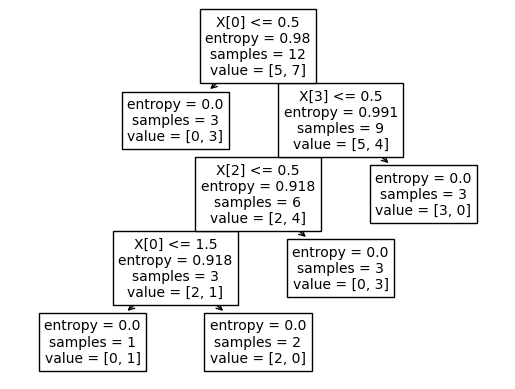

In [43]:
tree.plot_tree(classifier)